<a href="https://colab.research.google.com/github/vasantbala/vb_ai_course/blob/main/neural_networks/projects/CNN_PlantSpeciesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its 
unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's 
species from a photo.


### Step 1 - Import the libraries, load dataset, print shape of data, visualize the images in dataset

In [3]:
#import libraries
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from google.colab import drive
from keras.utils import to_categorical
from google.colab.patches import cv2_imshow

from tensorflow.keras.layers import Conv2D

In [4]:
# mount google drive  
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load datasets
data = np.load('/content/drive/MyDrive/AIProjectData/images.npy')
labeldata =  pd.read_csv('/content/drive/MyDrive/AIProjectData/Labels.csv')

In [6]:
# shape of data
data.shape

(4750, 128, 128, 3)

In [7]:
labeldata.shape

(4750, 1)

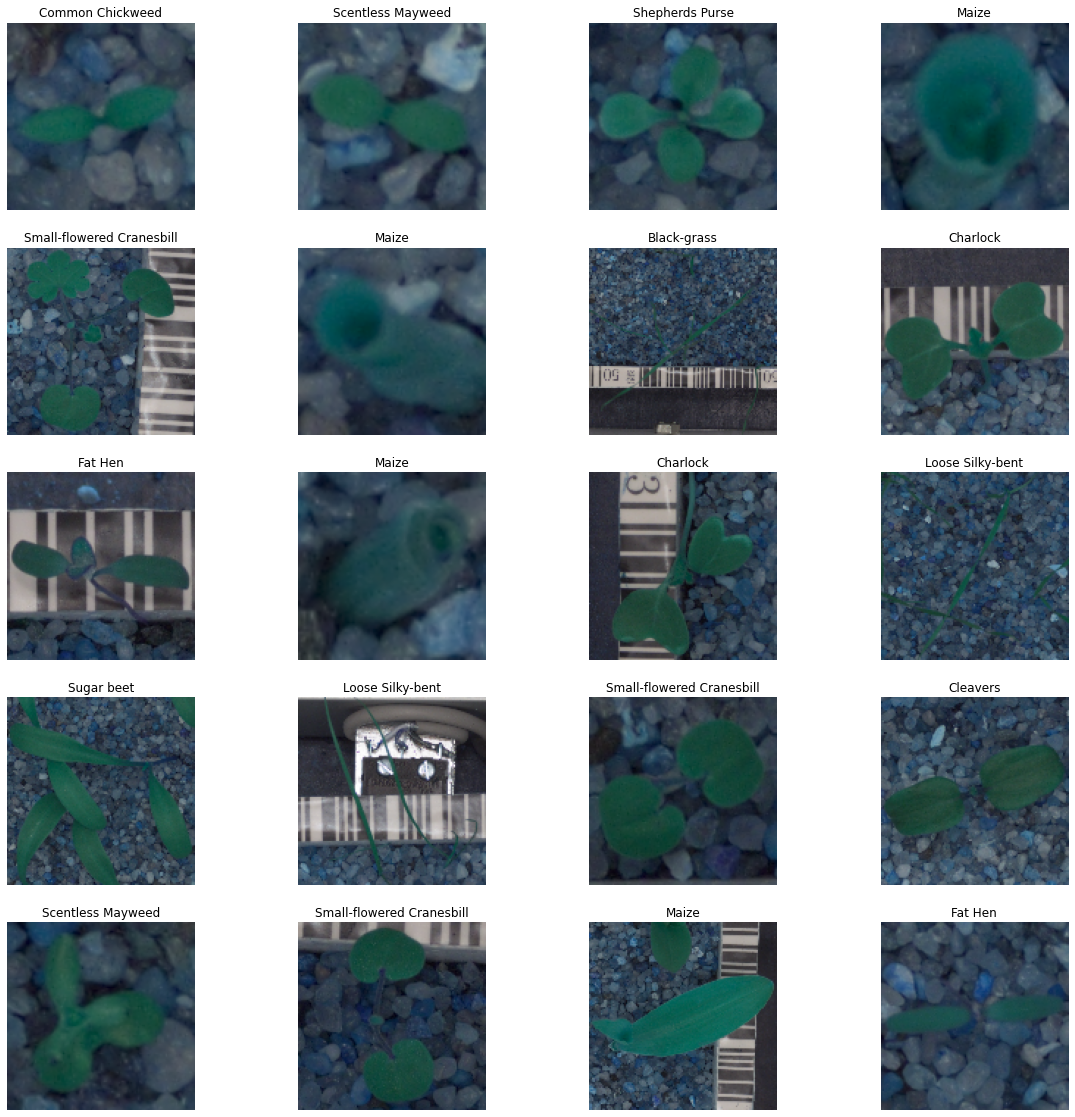

In [8]:
#visualize images in dataset
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(len(data))
    fig.add_subplot(rows, columns, i)
    plt.imshow(data[img])
    plt.title(labeldata.values[img][0])
    plt.axis('off')
plt.show()

### Step 2 - Data Pre-processing

#### Step 2.b - Gaussian Blurring

In [9]:
#take a copy of image data
ppdata = data.copy()

#perform gaussian blurring for every image
for x in range(len(data)):
  ppdata[x] = cv2.GaussianBlur(data[4], (15, 15), 0)

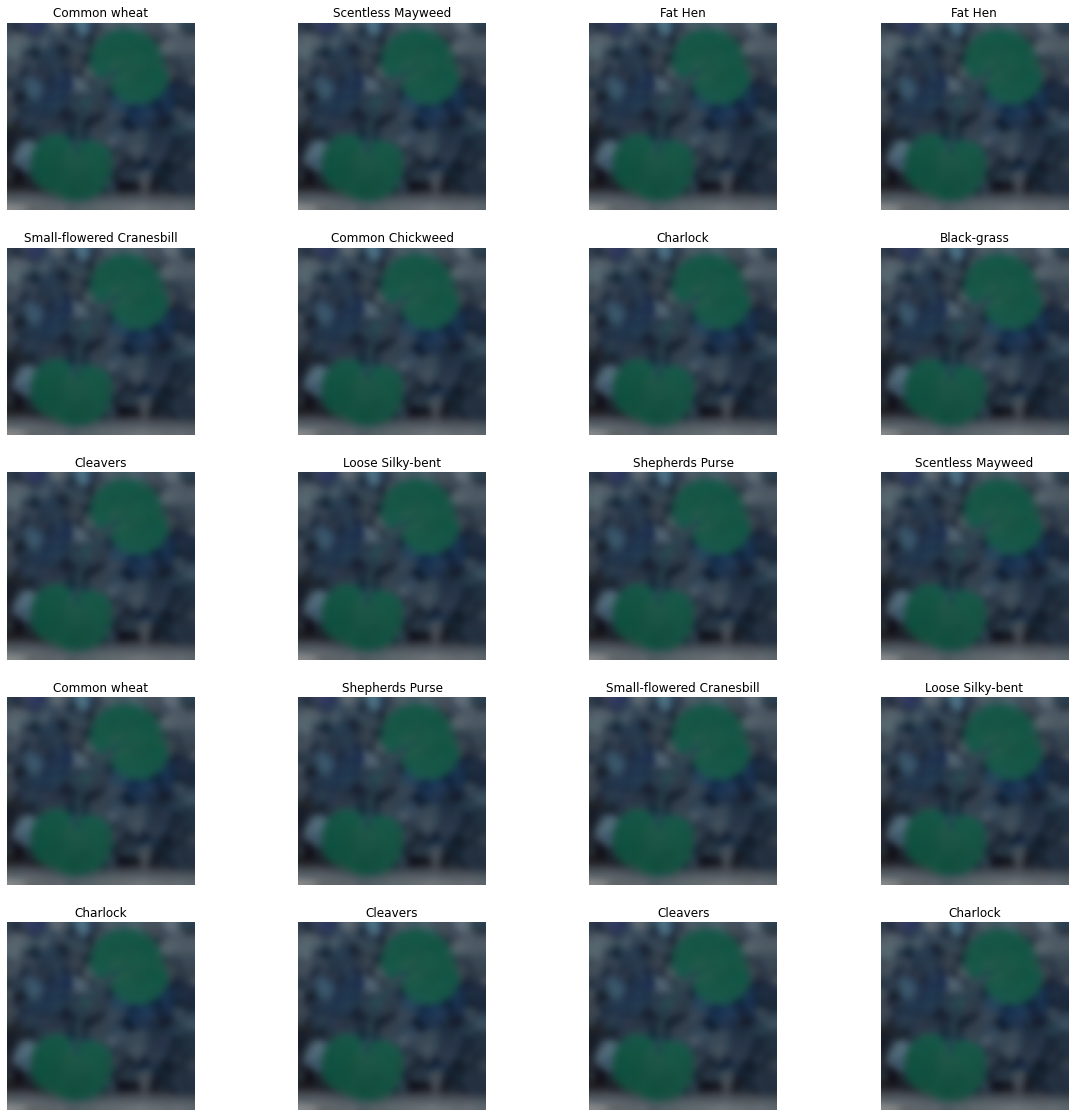

In [10]:
#visualize images in dataset after gaussian blurring
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(len(ppdata))
    fig.add_subplot(rows, columns, i)
    plt.imshow(ppdata[img])
    plt.title(labeldata.values[img][0])
    plt.axis('off')
plt.show()

#### Step 2.a - Normalization

In [11]:
ppdata = ppdata.astype('float32')
ppdata /= 255

In [12]:
print('Min: %.3f, Max: %.3f' % (ppdata.min(), ppdata.max()))

Min: 0.059, Max: 0.529


#### Step 2.c - Visualize data after pre-processing

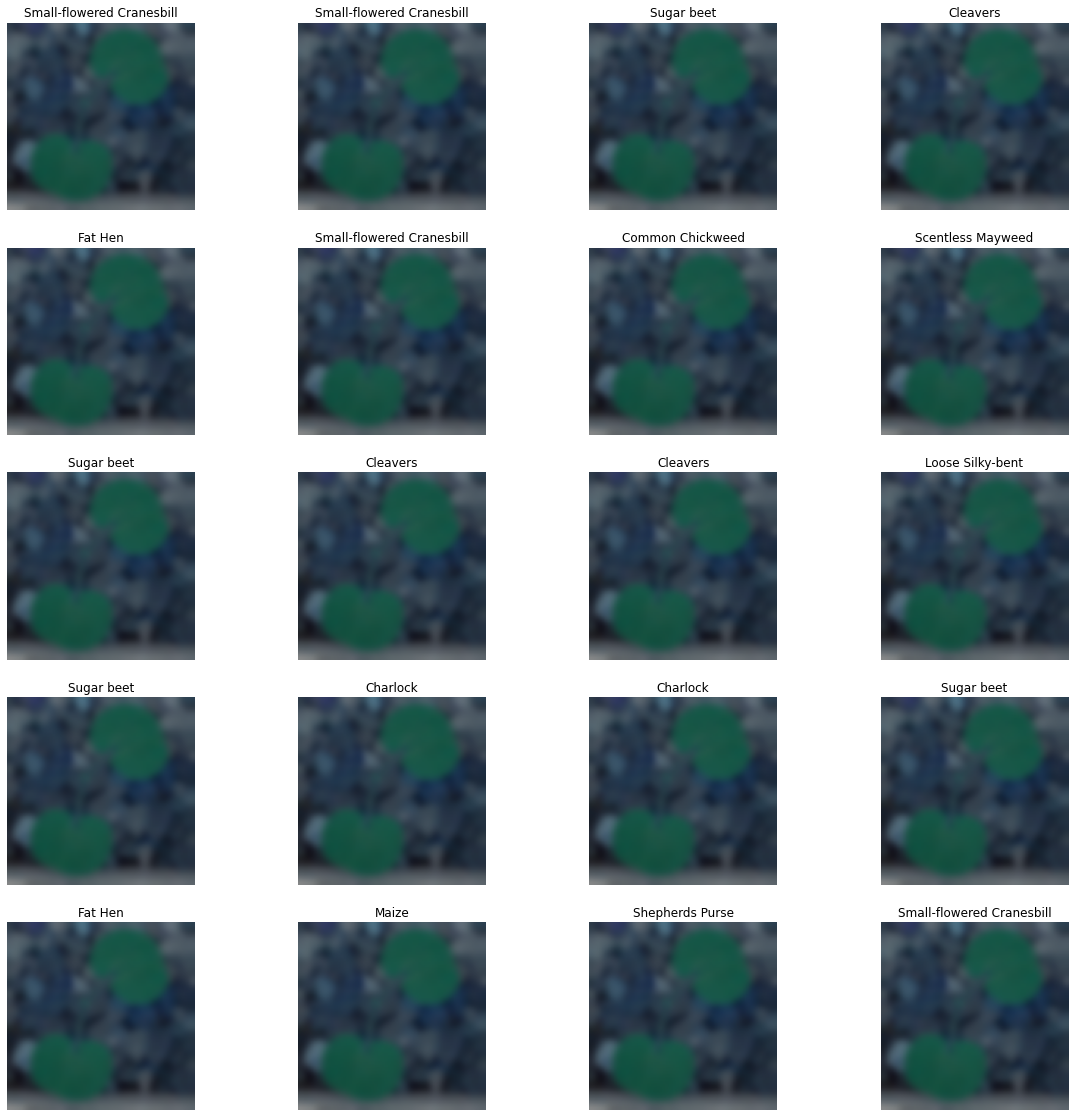

In [13]:
#visualize images in dataset after gaussian blurring
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(len(ppdata))
    fig.add_subplot(rows, columns, i)
    plt.imshow(ppdata[img])
    plt.title(labeldata.values[img][0])
    plt.axis('off')
plt.show()

### Step 3 - Make data compatible

#### Step 3.a - Convert labels to one-hot-vectors

In [14]:
pplabel = labeldata.copy()
unique_labels = pplabel.Label.unique()
labelArray = pplabel['Label']
### map each color to an integer
mapping = {}
for x in range(len(unique_labels)):
  mapping[unique_labels[x]] = x

# integer representation
for x in range(len(labelArray)):
  labelArray[x] = mapping[labelArray[x]]

one_hot_encode = to_categorical(labelArray)
print(one_hot_encode)
y_train = one_hot_encode

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [15]:
# validating the one hot encoding
for x in range(1, 10):
    i = np.random.randint(len(labeldata))
    print('Checking for index = ', i, 'expected = ', labeldata['Label'][i], 'actual = ', unique_labels[y_train[i].argmax()])


Checking for index =  632 expected =  Fat Hen actual =  Fat Hen
Checking for index =  4682 expected =  Loose Silky-bent actual =  Loose Silky-bent
Checking for index =  2763 expected =  Scentless Mayweed actual =  Scentless Mayweed
Checking for index =  2419 expected =  Charlock actual =  Charlock
Checking for index =  2930 expected =  Scentless Mayweed actual =  Scentless Mayweed
Checking for index =  861 expected =  Fat Hen actual =  Fat Hen
Checking for index =  1250 expected =  Common wheat actual =  Common wheat
Checking for index =  3035 expected =  Scentless Mayweed actual =  Scentless Mayweed
Checking for index =  4569 expected =  Loose Silky-bent actual =  Loose Silky-bent


#### Step 3.b - Print the label for y_train[0]

In [16]:
print('The label for y_train[0] is ', unique_labels[y_train[0].argmax()])


The label for y_train[0] is  Small-flowered Cranesbill


#### Step 3.c - Split the dataset into training, testing, and validation set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(ppdata, one_hot_encode, test_size=0.30, random_state = 7)

In [18]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state = 7)

#### Step 3.d - Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s 
already in the compatible shape, then comment in the notebook that it’s already in compatible shape

In [19]:
print('Shape of X_train is ', X_train.shape)
print('Shape of y_train is ', y_train.shape)
print('Shape of X_test is ', X_test.shape)
print('Shape of X_val is ', X_val.shape)
print('Shape of y_test is ', y_test.shape)
print('Shape of y_val is ', y_val.shape)

Shape of X_train is  (3325, 128, 128, 3)
Shape of y_train is  (3325, 12)
Shape of X_test is  (712, 128, 128, 3)
Shape of X_val is  (713, 128, 128, 3)
Shape of y_test is  (712, 12)
Shape of y_val is  (713, 12)


Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c) where n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
The shape of training, test and validation data is in the expected format

### Step 4 - Building CNN


In [20]:
import tensorflow as tf

#### Step 4.a - Define layers

In [21]:
model = tf.keras.models.Sequential()

# Input layer
# Can be omitted, you can specify the input_shape in other layers
model.add(tf.keras.layers.InputLayer(input_shape=(128,128,3,)))

# Here we add a 2D Convolution layer
# Check https://keras.io/api/layers/convolution_layers/convolution2d/ for more info
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

# Max Pool layer 
# It downsmaples the input representetion within the pool_size size
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
model.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
model.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
model.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Global Max Pool layer
model.add(tf.keras.layers.GlobalMaxPool2D())

# Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))

# Dropout
# is used to nullify the outputs that are very close to zero and thus can cause overfitting.
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Normalization layer
model.add(tf.keras.layers.BatchNormalization())

#Add Output Layer
model.add(tf.keras.layers.Dense(12, activation='softmax')) # = 12 predicted classes

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:

# Create data generator for training data with data augmentation and normalizing all
# values by 255
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)



In [26]:
# Setting training data generator's source directory ("." means the current directory. ("./dataset" means that dataset is inside current directory))
# Setting the target size to resize all the images to (64,64) as the model input layer expects 64X64 images
training_set = train_datagen.flow(X_train, y_train, batch_size=32)
# training_set = train_datagen.flow_from_directory('./dataset/train',
#                                                  target_size = (64, 64),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')

# "./dataset/test" means that test is inside dataset inside current directory.
# Setting testing data generator's source directory
test_set = test_datagen.flow(X_test, y_test, batch_size=32)
# test_set = test_datagen.flow_from_directory('./dataset/test',
#                                             target_size = (64, 64),
#                                             batch_size = 32,
#                                             class_mode = 'categorical')


# There are 1098 training images and 272 test images in total
model.fit(training_set,
                         steps_per_epoch = int(3325/32),
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = int(712/32))

Epoch 1/10
103/103 [==============================] - 46s 125ms/step - loss: 2.8424 - accuracy: 0.0980 - val_loss: 2.5211 - val_accuracy: 0.0753
Epoch 2/10
103/103 [==============================] - 12s 118ms/step - loss: 2.5356 - accuracy: 0.1099 - val_loss: 2.4794 - val_accuracy: 0.1335
Epoch 3/10
103/103 [==============================] - 12s 118ms/step - loss: 2.4852 - accuracy: 0.1349 - val_loss: 2.4582 - val_accuracy: 0.1307
Epoch 4/10
103/103 [==============================] - 12s 119ms/step - loss: 2.4715 - accuracy: 0.1384 - val_loss: 2.4397 - val_accuracy: 0.1307
Epoch 5/10
103/103 [==============================] - 12s 119ms/step - loss: 2.4499 - accuracy: 0.1376 - val_loss: 2.4300 - val_accuracy: 0.1222
Epoch 6/10
103/103 [==============================] - 12s 119ms/step - loss: 2.4514 - accuracy: 0.1289 - val_loss: 2.4255 - val_accuracy: 0.1222
Epoch 7/10
103/103 [==============================] - 12s 118ms/step - loss: 2.4520 - accuracy: 0.1248 - val_loss: 2.4368 - val_ac

#### Step 4.b - Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)


### Step 5 - Fit and evaluate model and print confusion matrix

### Step 6 - Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

In [30]:
model.save('./model.h5') 

In [31]:
model.save_weights('./model_weights.h5')

In [32]:
!ls

drive  model.h5  model_weights.h5  sample_data


In [49]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 62.95161437988281
Test accuracy: 0.05337078496813774


In [33]:
from tensorflow.keras.models import load_model                   # Loads a model saved via save_model.
from tensorflow.keras.preprocessing import image

In [35]:
# Load the pre trained model from the HDF5 file saved previously
pretrained_model = load_model('./model.h5')
pretrained_model.load_weights('./model_weights.h5')

In [42]:
Y_pred = model.predict(X_test)

In [43]:
Y_pred = np.argmax(Y_pred, axis=1)

In [44]:
Y_true = np.argmax(y_test, axis=1)

Text(0.5, 145.31999999999996, 'Predicted')

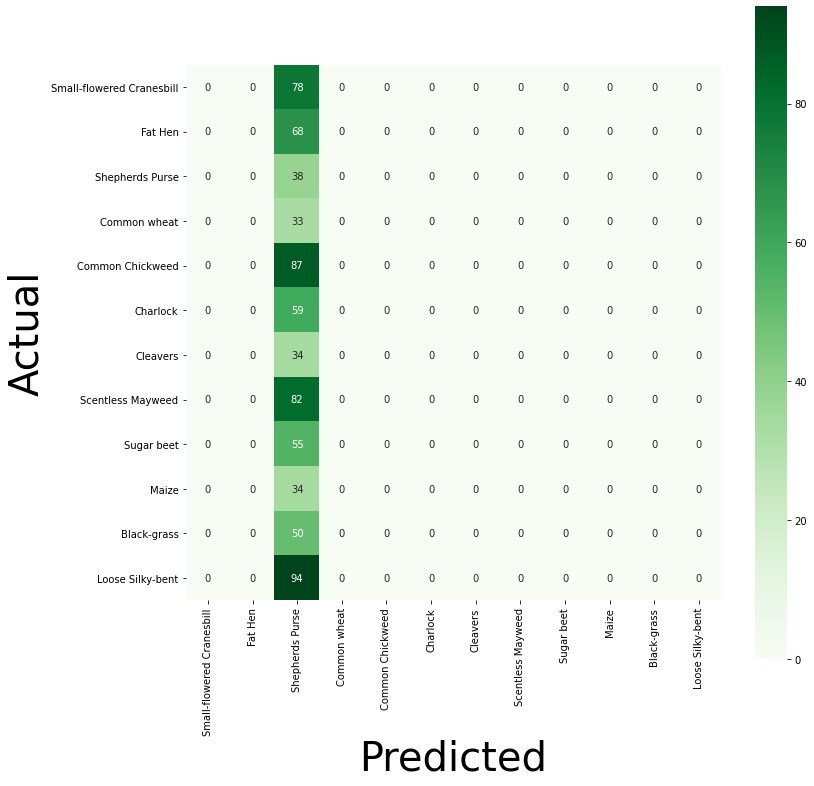

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=unique_labels, yticklabels=unique_labels)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)